## **Ciencias de Redes**

Estudia sistemas complejos mediante representaciones gráficas conocidas como grafos, las redes están compuestas por:

**-Nodos (vértices)**: Representan entidades individuales, como personas, computadoras, ciudades, genes, entre otros.   (pueden tener atributos)

**-Enlaces (aristas)**: Representan las relaciones o interacciones entre los nodos, como amistad, comunicación, rutas, o interacciones químicas. (pueden tener dirección y peso)


### Librerias 

La librería principal para el desarrollo y análisis de redes es **NetworkX**,permitiendo trabajar con grafos.

Se complementa con **Pandas** para la manipulación de datos y **Matplotlib** para la visualizacion de redes en proyectos de ciencia de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

### Grafos
Normalemente se determina con la letra **G**, y es una estructura matemática que se utiliza para modelar relaciones entre objetos.

In [2]:
# Creamos un objeto de grafo vacio
G = nx.Graph()
G

### Nodos

En un grafo, los **nodos** (también llamados vértices) representan los  elementos individuales que componen la estructura.

Cada nodo puede tener propiedades asociadas, como un nombre, un valor o una etiqueta, que proporcionan más información sobre la entidad que representa.

In [3]:
# Creamos 3 nodos de distintos tipos de datos
G.add_node(0)
G.add_node("Juan")
G.add_node((1.2,3.4))

# Creamos 3 nodos mediante una unica función
G.add_nodes_from([1,2,3,"Carlos"])

# Representamos los nodos creados
print("Nodos creados:", G.nodes())

Nodos creados: [0, 'Juan', (1.2, 3.4), 1, 2, 3, 'Carlos']


In [4]:
# Agregamos atributos a un nuevo nodo
G.add_node("Jorge", name="Jorge", type="string", color='red', size=2.80)

# Agregamos atributos mediante una lista
G.add_nodes_from([
    (0, {"name": "Nodo 0", "type": "integer", 'color': 'green', "size": 1.70}),
    (1, {"name": "Nodo 1", "type": "integer", 'color': 'blue', "size": 1.50}),
    ("Juan", {"name": "Juan", "type": "string", 'color': 'grey', "size": 2.10}),
    ((1.2, 3.4), {"name": "Tupla", "type": "tuple", 'color': 'brown', "size": 1.65})
])

# Mostramos información adicional de los nodos (ejemplo: tipo de nodo)
for node in G.nodes(data=True):
    print(f"Nodo: {node[0]}, Datos: {node[1]}")


Nodo: 0, Datos: {'name': 'Nodo 0', 'type': 'integer', 'color': 'green', 'size': 1.7}
Nodo: Juan, Datos: {'name': 'Juan', 'type': 'string', 'color': 'grey', 'size': 2.1}
Nodo: (1.2, 3.4), Datos: {'name': 'Tupla', 'type': 'tuple', 'color': 'brown', 'size': 1.65}
Nodo: 1, Datos: {'name': 'Nodo 1', 'type': 'integer', 'color': 'blue', 'size': 1.5}
Nodo: 2, Datos: {}
Nodo: 3, Datos: {}
Nodo: Carlos, Datos: {}
Nodo: Jorge, Datos: {'name': 'Jorge', 'type': 'string', 'color': 'red', 'size': 2.8}


In [5]:
# Eliminamos nodo especifico
nodo_a_eliminar = 2
G.remove_node(nodo_a_eliminar)
print(f"Nodo '{nodo_a_eliminar}' eliminado")
# Eliminamos nodos bajo condición sin atributos
for nodo in list(G.nodes):
    if not G.nodes[nodo]:  # Verifica si el nodo no tiene atributos
        G.remove_node(nodo)
        print(f"Nodo '{nodo}' eliminado")

print("Nodos para el grafo:", G.nodes())


Nodo '2' eliminado
Nodo '3' eliminado
Nodo 'Carlos' eliminado
Nodos para el grafo: [0, 'Juan', (1.2, 3.4), 1, 'Jorge']


**Atributos comunes para los nodos**

Los atributos más comunes que se pueden asignar a los nodos en un grafo:

| Atributo            | Descripción                                                              |
|---------------------|--------------------------------------------------------------------------|
| **`id`**            | Identificador único del nodo.                                             |
| **`Categoria`**     | Tipo de entidad que representa el nodo.                                  |
| **`color`**         | Color del nodo, útil para la visualización.                              |
| **`size`**          | Tamaño del nodo en visualizaciones gráficas.                             |
| **`connections`** o **`grados`** | Número de conexiones o grado del nodo.                                 |
| **`Coordenadas`**   | Coordenada de lat y long si representa una ubicación geográfica.         |
| **`Otros atributos`** | Ej: Edad, género, etc., dependiendo del contexto del grafo.               |



In [6]:
# Nodos para el ejemplo

num_nodos = len(G.nodes())
print(f"Cantidad de nodos: {num_nodos}")

G.nodes(data=True)



Cantidad de nodos: 5


NodeDataView({0: {'name': 'Nodo 0', 'type': 'integer', 'color': 'green', 'size': 1.7}, 'Juan': {'name': 'Juan', 'type': 'string', 'color': 'grey', 'size': 2.1}, (1.2, 3.4): {'name': 'Tupla', 'type': 'tuple', 'color': 'brown', 'size': 1.65}, 1: {'name': 'Nodo 1', 'type': 'integer', 'color': 'blue', 'size': 1.5}, 'Jorge': {'name': 'Jorge', 'type': 'string', 'color': 'red', 'size': 2.8}})

### Enlaces

Cada enlace conecta dos nodos y puede tener propiedades asociadas, tales como un peso, dirección o etiqueta, que proporcionan más información sobre la relación o interacción entre las entidades representadas por los nodos.


In [7]:
# Creamos 1 enlace entre dos nodos
G.add_edge(0,1)

# Creamos 3 enlances mediante una unica función
edge_list = [("Juan","Jorge"),("Jorge",1),("nuevo nodo","Jorge")]
G.add_edges_from(edge_list) 

# Representamos los enlaces
G.edges()# Se agregaron nuevos nodos sin creación previa


EdgeView([(0, 1), ('Juan', 'Jorge'), (1, 'Jorge'), ('Jorge', 'nuevo nodo')])

In [8]:
# Agregar los enlaces con los atributos de peso y color al grafo
edge_list = [
    (0, 1, {'weight': 0.5, 'color': 'red'}),  # u (nodo  de origen) , v (nodo destino) , atributos
    ('Juan', 'Jorge', {'weight': 0.2, 'color': 'blue'}),
    (1, 2, {'weight': 0.3, 'color': 'green'}),  
    (1, 'Jorge', {'weight': 0.4, 'color': 'yellow'}), 
    ('Jorge', 1, {'weight': 0.3, 'color': 'orange'}),  
    ('Jorge', (1.2,3.4), {'weight': 0.7, 'color': 'pink'})
]

# 
G.add_edges_from(edge_list)

In [9]:
# Revisamos los grados de cada enlace
for nodo, grado in G.degree():
    print(f"Nodo {nodo} - {grado} grados")

Nodo 0 - 1 grados
Nodo Juan - 1 grados
Nodo (1.2, 3.4) - 1 grados
Nodo 1 - 3 grados
Nodo Jorge - 4 grados
Nodo nuevo nodo - 1 grados
Nodo 2 - 1 grados


### Atributos Comunes para Enlaces

A continuación se presenta una tabla con los atributos más comunes que se pueden asignar a los enlaces en un grafo:

| Atributo   | Descripción                                                                                       | Ejemplo de Valor              |
|------------|---------------------------------------------------------------------------------------------------|--------------------------------|
| **`weight`** | El peso del enlace, que puede representar distancia, costo, tiempo, etc.                        | 5, 2.3, 0.1                   |
| **`color`**  | Color del enlace para visualización.                                                           | "red", "blue", "green"        |
| **`capacity`** | Capacidad del enlace (por ejemplo, para redes de flujo, representa la cantidad máxima que puede transportar). | 100, 200                      |
| **`length`** | Longitud o distancia del enlace, útil en grafos de redes geográficas.                           | 10, 50, 100                   |



In [10]:
# Enlaces para el ejemplo
num_enlaces = len(G.edges())
print(f"Cantidad de enlaces: {num_enlaces}")
G.edges(data=True)

Cantidad de enlaces: 6


EdgeDataView([(0, 1, {'weight': 0.5, 'color': 'red'}), ('Juan', 'Jorge', {'weight': 0.2, 'color': 'blue'}), ((1.2, 3.4), 'Jorge', {'weight': 0.7, 'color': 'pink'}), (1, 'Jorge', {'weight': 0.3, 'color': 'orange'}), (1, 2, {'weight': 0.3, 'color': 'green'}), ('Jorge', 'nuevo nodo', {})])

### Matriz de adyacencia 

La matriz de adyacencia es una representación bidimensional de un grafo, donde las filas y columnas corresponden a los nodos, y los valores en las celdas indican si hay un enlace entre esos nodos.

Tips  
-En grafos no dirigidos, la matriz es simétrica.  
-En grafos dirigidos, la matriz no es necesariamente simétrica.  
-En grafos ponderados, los valores representan el peso de los enlaces en lugar de solo 1 (si hay enlace) o 0 (si no hay enlace).

In [11]:
# Obtención mediante nx y transformación mediante pd
adj_matrix = nx.adjacency_matrix(G).todense()
adj_df = pd.DataFrame(adj_matrix, index=G.nodes, columns=G.nodes)

# Mostramos la matriz
print("Matriz de Adyacencia:")
print(adj_df)


Matriz de Adyacencia:
              0  Juan  (1.2, 3.4)    1  Jorge  nuevo nodo    2
0           0.0   0.0         0.0  0.5    0.0         0.0  0.0
Juan        0.0   0.0         0.0  0.0    0.2         0.0  0.0
(1.2, 3.4)  0.0   0.0         0.0  0.0    0.7         0.0  0.0
1           0.5   0.0         0.0  0.0    0.3         0.0  0.3
Jorge       0.0   0.2         0.7  0.3    0.0         1.0  0.0
nuevo nodo  0.0   0.0         0.0  0.0    1.0         0.0  0.0
2           0.0   0.0         0.0  0.3    0.0         0.0  0.0


### Visualización

Mediante plt y nx visualizamos la red creada a modo de ejemplo

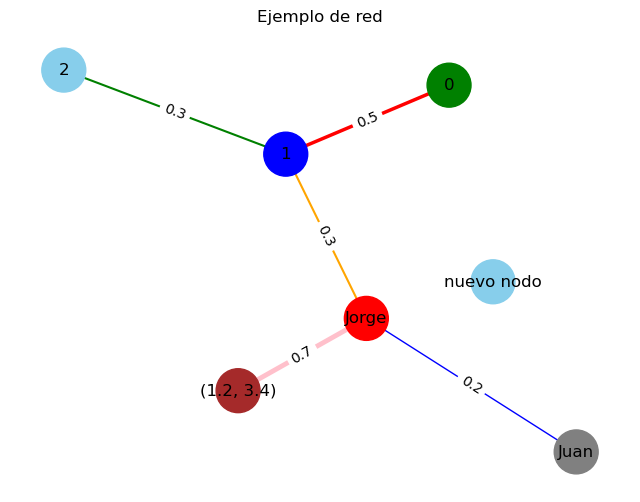

In [12]:
# Figura
plt.figure(figsize=(8, 6)) 

# Posición de los nodos
pos = nx.spring_layout(G)  # Usa el layout "spring" para una mejor visualización

# Dibujar nodos con atributos de color y tamaño
node_colors = [G.nodes[node].get('color', 'skyblue') for node in G.nodes()]
node_sizes = [G.nodes[node].get('size'*1000, 1000) for node in G.nodes()]  # Tamaño predeterminado es 700
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)

# Dibujar etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Dibujar enlaces con atributos de color y ancho basado en el peso
edge_colors = [G[u][v].get('color', 'white') for u, v in G.edges()] # Color predeterminado es Blanco
edge_weights = [G[u][v].get('weight', 1.0) for u, v in G.edges()]  # Peso predeterminado es 1.0

# El ancho de los enlaces será proporcional al peso
nx.draw_networkx_edges(G, pos, width=[w * 5 for w in edge_weights], edge_color=edge_colors)

# Agregar etiquetas de peso en los enlaces
edge_labels = nx.get_edge_attributes(G, 'weight')  # Extraer los pesos
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Mostrar el gráfico
plt.title("Ejemplo de red")
plt.axis('off')  # Ocultar ejes
plt.show()


## **Tarea N_1**

In [ ]:
# Grafo
Tarea_1 = nx.Graph()

In [ ]:
# Nodo
nodos_list = [1,2,3,4,5]
Tarea_1.add_nodes_from(nodos_list)
Tarea_1.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}})

In [ ]:
# Enlaces
dge_list = [(1,2,0.5), # u,v, peso
             (1,3,0.2),
             (1,5,0.3),
             (2,3,0.4),
             (2,4,0.7),
             (2,5,0.4),
             (3,4,0.2),
             (3,5,0.2),
             (4,5,0.1)]
Tarea_1.add_weighted_edges_from(edge_list)

In [ ]:
# Nodos y enlaces
print(Tarea_1.nodes)
print(Tarea_1.edges(data=True))

[1, 2, 3, 4, 5]
[(1, 2, {'weight': 0.5}), (1, 3, {'weight': 0.2}), (1, 5, {'weight': 0.3}), (2, 3, {'weight': 0.4}), (2, 4, {'weight': 0.7}), (2, 5, {'weight': 0.4}), (3, 4, {'weight': 0.2}), (3, 5, {'weight': 0.2}), (4, 5, {'weight': 0.1})]


In [ ]:
# Matriz de adyacencia
adj_matrix = nx.adjacency_matrix(Tarea_1).todense()

adj_df = pd.DataFrame(adj_matrix, index=Tarea_1.nodes, columns=Tarea_1.nodes)

print("Matriz de Adyacencia:")
print(adj_df)


Matriz de Adyacencia:
     1    2    3    4    5
1  0.0  0.5  0.2  0.0  0.3
2  0.5  0.0  0.4  0.7  0.4
3  0.2  0.4  0.0  0.2  0.2
4  0.0  0.7  0.2  0.0  0.1
5  0.3  0.4  0.2  0.1  0.0


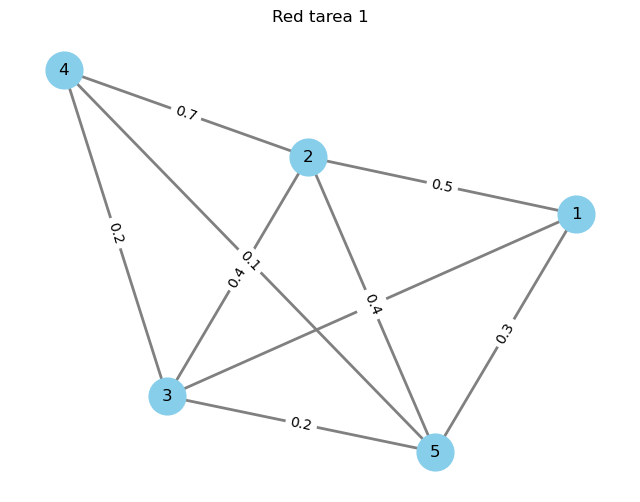

In [23]:
# Visualización

# Figura
plt.figure(figsize=(8, 6))

# Posición de los nodos
pos = nx.spring_layout(Tarea_1) 

# Nodos
nx.draw_networkx_nodes(Tarea_1, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(Tarea_1, pos, font_size=12, font_color='black')

# Enlaces
nx.draw_networkx_edges(Tarea_1, pos, width=2, edge_color='gray')
edge_labels = nx.get_edge_attributes(Tarea_1, 'weight')  # Extraer los pesos
nx.draw_networkx_edge_labels(Tarea_1, pos, edge_labels=edge_labels, font_size=10)

plt.title("Red tarea 1")
plt.axis('off')  # Ocultar ejes
plt.show()


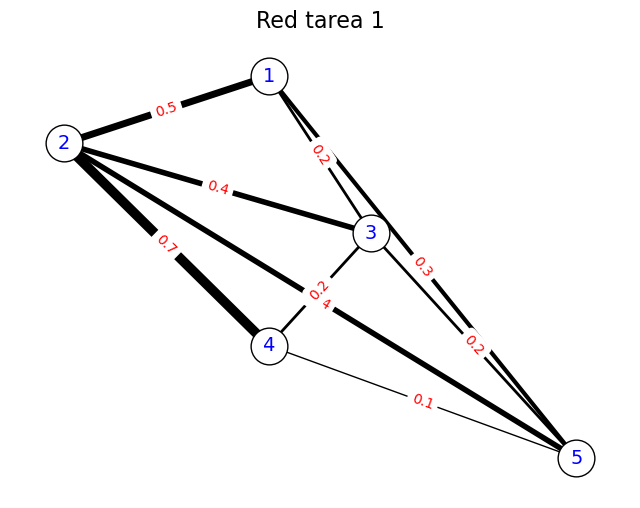

In [ ]:
# Replica de visualización de la red
# Fijar posiciones manuales de los nodos
pos = {
    1: (0, 1),   # Nodo 1 (parte superior)
    2: (-0.04, 0.5),  # Nodo 2 (izquierda)
    3: (0.03, 0.7),   # Nodo 3 (derecha)
    4: (0.015, 0.35),  # Nodo 4 (abajo a la derecha)
    5: (0, 0)  # Nodo 5 (abajo a la izquierda)
}

# Dibujar nodos y etiquetas
plt.figure(figsize=(8, 7))
nx.draw(
    Tarea_1, pos, with_labels=True,
    node_color='white', edgecolors='black',
    node_size=1000, font_size=15, font_color='blue', font_weight='bold'
)

# Dibujar aristas curvadas manualmente
arc_edges = [(3, 5), (1, 5)]  # Aristas que queremos curvar
curvatures = [-0.4, -1.5]  # Radios de curvatura
for (u, v), rad in zip(arc_edges, curvatures):
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    weight = Tarea_1[u][v]['weight']  # Obtener peso de la arista
    plt.annotate(
        '', xy=(x2, y2), xytext=(x1, y1),
        arrowprops=dict(
            arrowstyle='-', color='black', shrinkA=15, shrinkB=15,
            connectionstyle=f"arc3,rad={rad}"
        )
    )
    # Dibujar etiqueta del peso para la arista curva
    mid_x, mid_y = (x2 - x1) / 2, (y1 + y2) / 2  # Punto medio
    offset = 0.05 if rad < 0 else -0.05  # Ajustar la posición de la etiqueta
    plt.text(
        mid_x + offset, mid_y + offset, f'{weight:.1f}',
        color='red', fontsize=12, ha='center'
    )

# Dibujar etiquetas de las aristas (incluyendo las curvadas)
labels = nx.get_edge_attributes(Tarea_1, 'weight')
nx.draw_networkx_edge_labels(Tarea_1, pos, edge_labels=labels, font_size=12, font_color='red')

plt.show()

